# AGN core analysis

Produce sensitivity and DP plots for the 3 AGN samples created for this analysis: Radio/IR-Selected RLAGN + LLAGN. The 8 years Northern Tracks sample is used.

In [1]:
import astropy.io.fits as pyfits
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy import units as u
from matplotlib import ticker

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('/Users/federica/.matplotlib/stylelib/phdthesis.mpltstyle')


from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import StrMethodFormatter
from matplotlib import ticker
# minorLocator = AutoMinorLocator()

from matplotlib.ticker import ScalarFormatter

In [2]:
#Create a folder with today data

import datetime
now = datetime.datetime.now()
todaydata = str(now.year)+'_'+str(now.month)+'_'+str(now.day)

import os
# plots_path = '/Users/federica/Documents/DESY/ICECUBE_PhD/ANALYSIS/RGstacking/plots/catalogs/'+todaydata
plots_path = '/Users/federica/Documents/ICECUBE_PhD/ANALYSIS/RGstacking/plots/sens_dp_study/'+'all_agn_samples/noSeyfPDF/'
if not os.path.exists(plots_path):
    os.makedirs(plots_path)

# Merge tables - dont run if table is already there

In [4]:
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set1_9
import palettable

from palettable.colorbrewer.sequential import YlOrRd_9

niceblack = '#262626'
cmap = ListedColormap(palettable.colorbrewer.qualitative.Set1_9.mpl_colors)
colors_set1_9 = cmap.colors

cmap = ListedColormap(YlOrRd_9.mpl_colors)
colors_YlOrRd_9 = cmap.colors

from palettable.cartocolors.qualitative import Prism_10
cmap = ListedColormap(Prism_10.mpl_colors)
colors_Prism_8 = cmap.colors

from palettable.cartocolors.sequential import OrYel_7
cmap = ListedColormap(OrYel_7.mpl_colors)
colors_orange = cmap.colors


from palettable.cartocolors.sequential import Teal_7
cmap = ListedColormap(Teal_7.mpl_colors)
colors_blue = cmap.colors


In [8]:
def erg_dp_sens(df):
    dp_gev = np.array(df["dp"])
    dp_gev = dp_gev*u.GeV*u.cm**(-2)*u.s**(-1)
    print(type(dp_gev.value))
    dp_erg = dp_gev.to(u.erg*u.cm**(-2)*u.s**(-1))
    dp_erg = dp_erg.to_value()

    sen_gev = np.array(df["sensitivity"])
    sen_gev = sen_gev*u.GeV*u.cm**(-2)*u.s**(-1)
    print(type(sen_gev.value))
    sen_erg = sen_gev.to(u.erg*u.cm**(-2)*u.s**(-1))
    sen_erg = sen_erg.to_value()

    df['dp_erg'] = dp_erg
    df['sensitivity_erg'] = sen_erg

# Sky-coverage of the 3 AGN samples 

In [6]:
area_AGN_sample = (6.771679389247464e-05*u.GeV/u.s/u.cm**2)  # for the radio/ir-selected AGN samples
area_LLAGN_sample = (4.4254166e-05*u.GeV/u.s/u.cm**2)

# import tables

In [5]:
rsrlagn_gamma2 = np.loadtxt("/Users/federica/Documents/ICECUBE_PhD/ANALYSIS/RGstacking/AGNcore_senitivity_dp_study/data/rlagn_radio/nt8yr_dataset/RSRLAGN_nt8yr_15steps_scaleby3_newcat.out")
irsrlagn_gamma2 = np.loadtxt("/Users/federica/Documents/ICECUBE_PhD/ANALYSIS/RGstacking/AGNcore_senitivity_dp_study/data/rlagn_ir/IRSRLAGN_nt8yr_15steps_scaleby3_newcat_gamma2.out")

llagn_gamma2 = np.loadtxt("/Users/federica/Documents/ICECUBE_PhD/ANALYSIS/RGstacking/AGNcore_senitivity_dp_study/data/llagn/LLAGN_nt8yr_15steps_scaleby3_newcat_gamma2.out")

rsrlagn_gamma2 = rsrlagn_gamma2.T
irsrlagn_gamma2 = irsrlagn_gamma2.T
llagn_gamma2 = llagn_gamma2.T

header="n_src, int_xray_flux_erg, sensitivity, dp," 
       "ratio_sens, ratio_dp,"
       "ratio_sens_saturate, ratio_dp_saturate",

In [9]:
df_rsrlagn_gamma2 = pd.DataFrame(rsrlagn_gamma2 , 
                       columns=["n_src", "int_xray_flux_erg", 
                               "sensitivity_perFlux", "sensitivity_err_lower", "sensitivity_err_upper",
                               "dp_perFlux", "disc_ts_threshold",
                               "sensitivity", "dp",  # these are integrated sens and dp
                               "ratio_sens", "ratio_dp",
                               "ratio_sens_saturate", "ratio_dp_saturate",
                               "sensitivity_nr_neutrinos", "dp_nr_neutrinos"])

df_irsrlagn_gamma2 = pd.DataFrame(irsrlagn_gamma2 ,
                       columns=["n_src", "int_xray_flux_erg", 
                               "sensitivity_perFlux", "sensitivity_err_lower", "sensitivity_err_upper",
                               "dp_perFlux", "disc_ts_threshold",
                               "sensitivity", "dp",  # these are integrated sens and dp
                               "ratio_sens", "ratio_dp",
                               "ratio_sens_saturate", "ratio_dp_saturate",
                               "sensitivity_nr_neutrinos", "dp_nr_neutrinos"])

df_llagn_gamma2 = pd.DataFrame(llagn_gamma2 , #[rsrlagn[0,:],rsrlagn[1,:], rsrlagn[2,:], rsrlagn[3,:]],
                       columns=["n_src", "int_xray_flux_erg", #"int_xray_flux_erg_noseyfertness", 
                               "sensitivity_perFlux", "sensitivity_err_lower", "sensitivity_err_upper",
                               "dp_perFlux", "disc_ts_threshold",
                               "sensitivity", "dp",  # these are integrated sens and dp
                               "ratio_sens", "ratio_dp",
                               "ratio_sens_saturate", "ratio_dp_saturate",
                               "sensitivity_nr_neutrinos", "dp_nr_neutrinos"])


erg_dp_sens(df_rsrlagn_gamma2)
erg_dp_sens(df_irsrlagn_gamma2)
erg_dp_sens(df_llagn_gamma2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Weights distribution

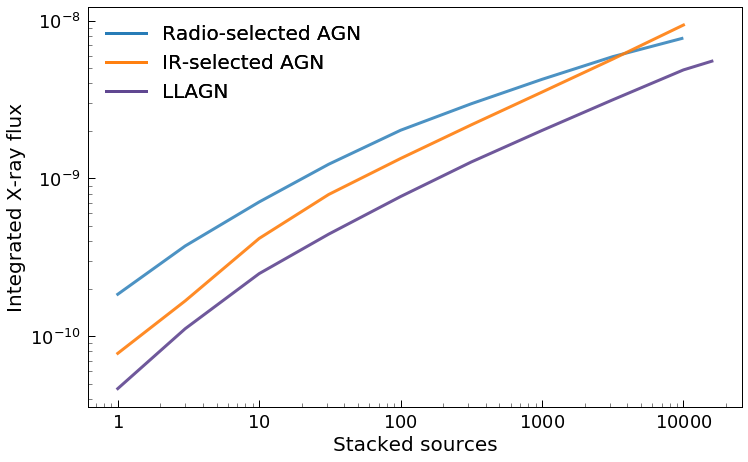

In [12]:
fig1 = plt.figure(1,figsize=(10*1.05, 10*1.05/1.61))
ax1 = plt.subplot(1,1,1)


ax1.plot(df_rsrlagn_gamma2["n_src"], 
         df_rsrlagn_gamma2["int_xray_flux_erg"], 
         ls='-',  lw=3, 
         color='C0', alpha=0.8,
         label='Radio-selected AGN')
ax1.plot(df_irsrlagn_gamma2["n_src"], 
         df_irsrlagn_gamma2["int_xray_flux_erg"], 
         ls='-',  lw=3,
         color='C1', alpha=0.9,
         label='IR-selected AGN')
ax1.plot(df_llagn_gamma2["n_src"], 
         df_llagn_gamma2["int_xray_flux_erg"], 
         ls='-',  lw=3, 
         color=colors_Prism_8[0], alpha=0.9,
         label='LLAGN')



ax1.set_ylabel(r'Integrated X-ray flux')
ax1.grid(False) # which='both')
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel(r'Stacked sources')
ax1.set_xticks([1, 10, 100, 1000, 10000])
ax1.get_xaxis().set_major_formatter(ScalarFormatter())

handles, labels = ax1.get_legend_handles_labels()
display = (0,1,2)
simArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='-',lw=3)
anyArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='--',lw=3)
anyArtist2 = plt.Line2D((0,1),(0,0), color='gray', linestyle=':',lw=3)

legend1 = ax1.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc= 'upper left' , 
                     frameon=0,
                    framealpha =1, ncol=1, prop={'size':20})
plt.gca().add_artist(legend1)

# plt.annotate("IceCube\nPreliminary ", (0.65, 0.1), alpha=0.7, fontsize=30, xycoords="axes fraction",
#              multialignment="center")

# plt.grid()
plt.tight_layout()
# fig1.savefig(plots_path + "rlagn_radio_ir_llagn_weights_vs_srcs_normalized_at_100.png", format='png')

## nu energy flux vs number of sources

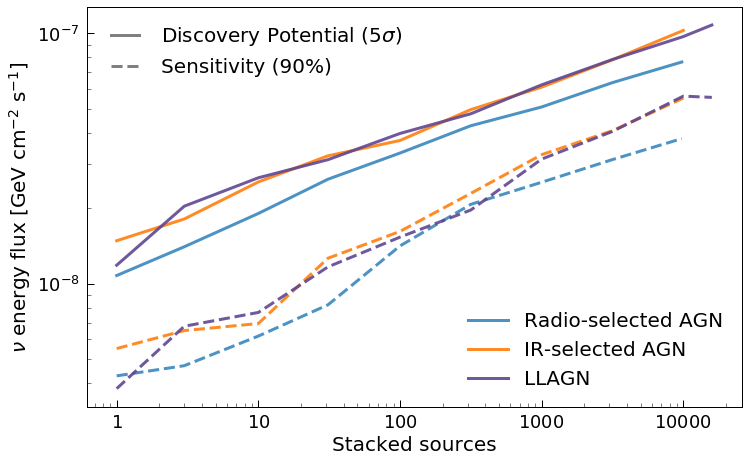

In [13]:
# Create plot of nu energy flux vs number of sources

fig1 = plt.figure(1,figsize=(10*1.05, 10*1.05/1.61))
ax1 = plt.subplot(1,1,1)
ax1.plot(df_rsrlagn_gamma2[df_rsrlagn_gamma2['dp']>0]["n_src"][:], 
         df_rsrlagn_gamma2[df_rsrlagn_gamma2['dp']>0]['dp'], 
         ls='-', lw=3,
         color='C0', alpha=0.8,
         label = r'Radio-selected AGN')
ax1.plot(df_rsrlagn_gamma2["n_src"][:], df_rsrlagn_gamma2['sensitivity'], 
         ls='--', lw=3,
         color='C0', alpha=0.8,
         label = r'$\gamma = -2$')

ax1.plot(df_irsrlagn_gamma2[df_irsrlagn_gamma2['dp']>0]["n_src"][:], 
         df_irsrlagn_gamma2[df_irsrlagn_gamma2['dp']>0]['dp'], ls='-', lw=3,
         color='C1', alpha=0.9,
         label = r'IR-selected AGN')
ax1.plot(df_irsrlagn_gamma2["n_src"][:], df_irsrlagn_gamma2['sensitivity'], 
         ls='--', lw=3,
         color='C1', alpha=0.9,
         label = r'$\gamma = -2$')


ax1.plot(df_llagn_gamma2[df_llagn_gamma2['dp']>0]["n_src"][:], 
         df_llagn_gamma2[df_llagn_gamma2['dp']>0]['dp'], ls='-', lw=3,
         color=colors_Prism_8[0], alpha=0.9,
         label = r'LLAGN')
ax1.plot(df_llagn_gamma2["n_src"][:], df_llagn_gamma2['sensitivity'], 
             ls='--', lw=3,
         color=colors_Prism_8[0], alpha=0.9,
         label = r'$\gamma = -2$')

ax1.set_ylabel(r'$\nu$ energy flux [GeV cm$^{-2}$ s$^{-1}$]') #,color='C0')

ax1.grid(False) # which='both')
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel('Stacked sources')
ax1.set_xticks([1, 10, 100, 1000, 10000])
ax1.get_xaxis().set_major_formatter(ScalarFormatter())


handles, labels = ax1.get_legend_handles_labels()
display = (0,2,4)
simArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='-',lw=3)
anyArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='--',lw=3)
legend1 = ax1.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc= 'lower right' , 
                     frameon=0,
                    framealpha =1, ncol=1, prop={'size':20})
plt.gca().add_artist(legend1)

leg = ax1.legend([simArtist, anyArtist], [r'Discovery Potential ($5\sigma$)', r'Sensitivity (90%)'],
                loc = 'upper left', framealpha = 1, prop={'size':20}, 
                frameon=0, ncol=1, numpoints=2)


# plt.annotate("IceCube\nPreliminary ", (0.65, 0.1), alpha=0.7, fontsize=30, xycoords="axes fraction",
#              multialignment="center")



plt.tight_layout()
# fig1.savefig(plots_path + "nt8yr_gamma2_rlagn_radio_ir_llagn_sens_col.png", format='png')

## nu energy flux per sources vs number of sources

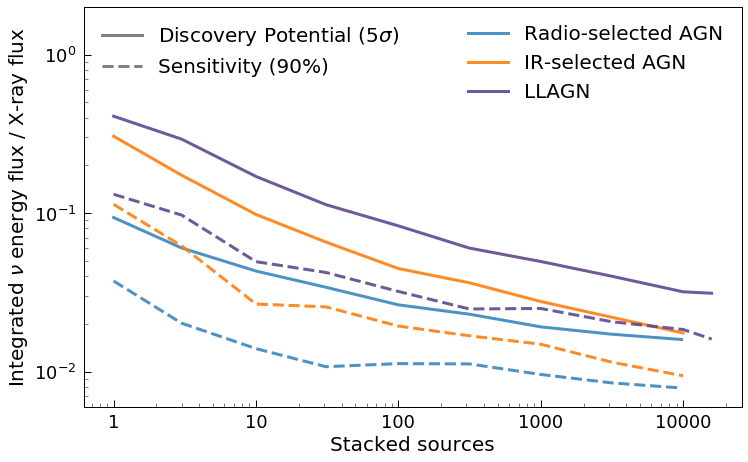

In [17]:
# Create plot of nu energy flux divided by the integrated X-ray flux (weight). 
# This gives the sen/DP per source

fig1 = plt.figure(1,figsize=(10*1.05, 10*1.05/1.61))
ax = plt.subplot(1,1,1)

ax.plot(df_rsrlagn_gamma2[df_rsrlagn_gamma2['ratio_dp']>0]["n_src"][:], 
         df_rsrlagn_gamma2[df_rsrlagn_gamma2['ratio_dp']>0]['ratio_dp'], ls='-', lw=3,
         color='C0', alpha=0.8,
         label = r'Radio-selected AGN')
ax.plot(df_rsrlagn_gamma2["n_src"][:], df_rsrlagn_gamma2['ratio_sens'], 
             ls='--', lw=3,
         color='C0', alpha=0.8,
         label = r'$\gamma = -2$')

ax.plot(df_irsrlagn_gamma2[df_irsrlagn_gamma2['ratio_dp']>0]["n_src"][:], 
        df_irsrlagn_gamma2[df_irsrlagn_gamma2['ratio_dp']>0]['ratio_dp'], ls='-', lw=3,
        color='C1', alpha=0.9,
        label = r'IR-selected AGN')
ax.plot(df_irsrlagn_gamma2["n_src"][:], df_irsrlagn_gamma2['ratio_sens'], 
        ls='--', lw=3,
        color='C1', alpha=0.9,
        label = r'$\gamma = -2$')


ax.plot(df_llagn_gamma2[df_llagn_gamma2['ratio_dp']>0]["n_src"][:], 
         df_llagn_gamma2[df_llagn_gamma2['ratio_dp']>0]['ratio_dp'], ls='-', lw=3,
         color=colors_Prism_8[0], alpha=0.9,
         label = r'LLAGN')
ax.plot(df_llagn_gamma2["n_src"][:], df_llagn_gamma2['ratio_sens'], 
        ls='--', lw=3,
        color=colors_Prism_8[0], alpha=0.9,
        label = r'$\gamma = -2$')


plt.yscale(u'log')
plt.xscale(u'log')

ax.set_xlabel(r'Stacked sources')
ax.set_xticks([1, 10, 100, 1000, 10000])
minorLocator = AutoMinorLocator()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

plt.ylabel(r'Integrated $\nu$ energy flux / X-ray flux')

handles, labels = ax.get_legend_handles_labels()
display = (0,2,4)
simArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='-',lw=3)
anyArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='--',lw=3)
legend1 = ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc= 'upper right' , 
                     frameon=0,
                    framealpha =1, ncol=1, prop={'size':20})
plt.gca().add_artist(legend1)

dpArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='-',lw=3)
sensArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='--',lw=3)

ax.legend([dpArtist, sensArtist],
           [r'Discovery Potential ($5\sigma$)', r'Sensitivity (90%)'],
#           bbox_to_anchor=(0.2, 1.13), 
          ncol=1,          
          loc = 'upper left', framealpha = 1, prop={'size':20}, frameon=0)


plt.grid(0)
plt.ylim(6e-3,2)
plt.tight_layout()
# fig1.savefig(plots_path + "nt8yr_gamma2_rlagn_radio_ir_llagn_sens_integrated_nu_flux_x_source_log.png", format='png')


## Number of neutrinos

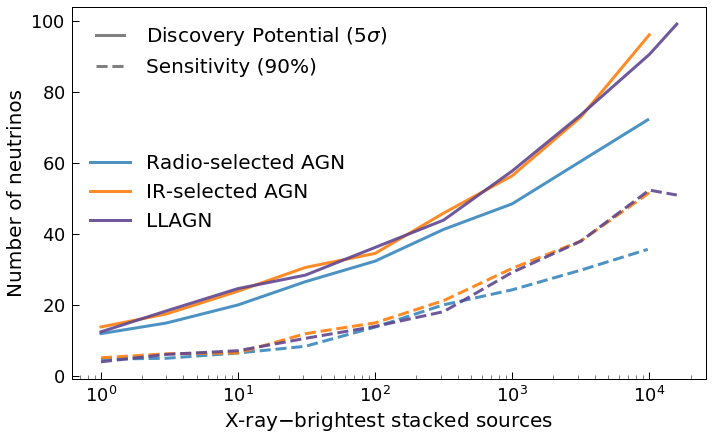

In [18]:
# Create plot of number of neutrinos vs nr. of stacked sources

fig1 = plt.figure(1,figsize=(10, 10/1.61))
ax = plt.subplot(1,1,1)

    
ax.plot(df_rsrlagn_gamma2[df_rsrlagn_gamma2['dp_nr_neutrinos']>0]["n_src"][:], 
         df_rsrlagn_gamma2[df_rsrlagn_gamma2['dp_nr_neutrinos']>0]['dp_nr_neutrinos'], ls='-', lw=3,
#          marker = 'o',
         color='C0', alpha=0.8,
         label = r'Radio-selected AGN')
#          label = r'Discovery Potential ($5\sigma$)')
ax.plot(df_rsrlagn_gamma2["n_src"][:], df_rsrlagn_gamma2['sensitivity_nr_neutrinos'], 
             ls='--', lw=3,
         color='C0', alpha=0.8,
         # marker = 'o',
#          label = r'Sensitivity ($90\%$)')
         label = r'$\gamma = -2$')

ax.plot(df_irsrlagn_gamma2[df_irsrlagn_gamma2['dp_nr_neutrinos']>0]["n_src"][:], 
         df_irsrlagn_gamma2[df_irsrlagn_gamma2['dp_nr_neutrinos']>0]['dp_nr_neutrinos'], ls='-', lw=3,
         color='C1', alpha=0.9,
         label = r'IR-selected AGN')
ax.plot(df_irsrlagn_gamma2["n_src"][:], df_irsrlagn_gamma2['sensitivity_nr_neutrinos'], 
        ls='--', lw=3,
        color='C1', alpha=0.9,
        label = r'$\gamma = -2$')


ax.plot(df_llagn_gamma2[df_llagn_gamma2['dp_nr_neutrinos']>0]["n_src"][:], 
         df_llagn_gamma2[df_llagn_gamma2['dp_nr_neutrinos']>0]['dp_nr_neutrinos'], ls='-', lw=3,
         color=colors_Prism_8[0], alpha=0.9,
         label = r'LLAGN')
ax.plot(df_llagn_gamma2["n_src"][:], df_llagn_gamma2['sensitivity_nr_neutrinos'], 
        ls='--', lw=3,
        color=colors_Prism_8[0], alpha=0.9,
        label = r'$\gamma = -2$') 
    
plt.xscale(u'log')

ax.set_xlabel(r'X-ray$-$brightest stacked sources')
ax.set_xticks([1, 10, 100, 1000, 10000])


plt.ylabel(r'Number of neutrinos')
handles, labels = ax.get_legend_handles_labels()
display = (0,2,4)
simArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='-',lw=3)
anyArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='--',lw=3)
legend1 = ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc= 'center left' , 
                     frameon=0,
                    framealpha =1, ncol=1, prop={'size':20})
plt.gca().add_artist(legend1)

leg = ax.legend([simArtist, anyArtist], [r'Discovery Potential ($5\sigma$)', r'Sensitivity (90%)'],
                loc = 'upper left', framealpha = 1, prop={'size':20}, 
                frameon=0, ncol=1, numpoints=2)




plt.tight_layout()

ax.grid(False)
# fig1.savefig(plots_path + "nt8yr_gamma2_rlagn_radio_ir_llagn_nr_nu.png", format='png')

# Diffuse neutrinos flux

## Case 1: $\Gamma = -2 $

In [20]:
all_flavour_diffuse_flux_gamma2 = 0.6287313432835817 * 10 ** -18 * (
                u.GeV ** -1 * u.cm ** -2 * u.s ** -1 * u.sr ** -1
        )
diffuse_gamma = 2
integral = 11.512925464970229*u.GeV**2

In [21]:
int_diff_flux_min2 = all_flavour_diffuse_flux_gamma2 * (10 ** 5) ** diffuse_gamma * integral *4*np.pi*u.steradian
int_diff_flux_min2

<Quantity 9.09621398e-07 GeV / (cm2 s)>

In [24]:
# Fraction of diffuse flux divided by the total AGN integrated X-ray flux
# for radio/ir-selected AGN
saturate_ratio_minus2spectrumRLAGN = int_diff_flux_min2/area_AGN_sample# area RLAGN-radio selected in erg cm-2 s-1
saturate_ratio_minus2spectrumRLAGN

<Quantity 0.01343273>

In [25]:
# Fraction of diffuse flux divided by the total AGN integrated X-ray flux
# for LLAGN
saturate_ratio_minus2spectrumLLAGN = int_diff_flux_min2/area_LLAGN_sample# area RLAGN-radio selected in erg cm-2 s-1
saturate_ratio_minus2spectrumLLAGN

<Quantity 0.02055448>

## Case 2: $\Gamma = -2.5 $

In [26]:
all_flavour_diffuse_flux_gamma25 = 1.251412429378531 * 10 ** -18 * (
                u.GeV ** -1 * u.cm ** -2 * u.s ** -1 * u.sr ** -1
        )
diffuse_gamma25 = 2.5
integral25 = 0.199368*u.GeV**2
all_flavour_diffuse_flux_gamma25

<Quantity 1.25141243e-18 1 / (cm2 GeV s sr)>

In [27]:
int_diff_flux_min25 = all_flavour_diffuse_flux_gamma25 * (10 ** 5) ** diffuse_gamma25 * integral25 *4*np.pi*u.steradian
int_diff_flux_min25

<Quantity 9.91438502e-06 GeV / (cm2 s)>

In [30]:
# Fraction of diffuse flux divided by the total AGN integrated X-ray flux
# for radio/ir-selected AGN
saturate_ratio_minus25spectrumRLAGN = int_diff_flux_min25/area_AGN_sample# area RLAGN-radio/ir selected in erg cm-2 s-1
saturate_ratio_minus25spectrumRLAGN

<Quantity 0.14640955>

In [31]:
# Fraction of diffuse flux divided by the total AGN integrated X-ray flux
# for LLAGN
saturate_ratio_minus25spectrumLLAGN = int_diff_flux_min25/area_LLAGN_sample# area RLAGN-radio selected in erg cm-2 s-1
saturate_ratio_minus25spectrumLLAGN

<Quantity 0.22403281>

## Diffuse flux from joint analysis https://arxiv.org/pdf/1507.03991.pdf

In [33]:
# Diffuse flux from joint analysis https://arxiv.org/pdf/1507.03991.pdf
all_flavour_diffuse_flux_gamma25_joint =6.7 * 10 ** -18 * (
                u.GeV ** -1 * u.cm ** -2 * u.s ** -1 * u.sr ** -1
        )
all_flavour_diffuse_flux_gamma25_joint = all_flavour_diffuse_flux_gamma25_joint/3
diffuse_gamma25 = 2.5
integral25 = 0.199368*u.GeV**2
all_flavour_diffuse_flux_gamma25_joint

<Quantity 2.23333333e-18 1 / (cm2 GeV s sr)>

In [34]:
int_diff_flux_min25_joint = all_flavour_diffuse_flux_gamma25_joint * (10 ** 5) ** diffuse_gamma25 * integral25 *4*np.pi*u.steradian
int_diff_flux_min25_joint

<Quantity 1.76937083e-05 GeV / (cm2 s)>

In [35]:
saturate_ratio_minus25spectrum_jointRLAGN = int_diff_flux_min25_joint/area_AGN_sample #(6.771679389247464e-05*u.GeV/u.s/u.cm**2)
saturate_ratio_minus25spectrum_jointRLAGN

<Quantity 0.26128981>

In [40]:
saturate_ratio_minus25spectrum_jointLLAGN = int_diff_flux_min25_joint/area_LLAGN_sample #(6.771679389247464e-05*u.GeV/u.s/u.cm**2)
saturate_ratio_minus25spectrum_jointLLAGN

<Quantity 0.39982017>

## Normalized over gamma =-2.0 (true diffuse flux)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


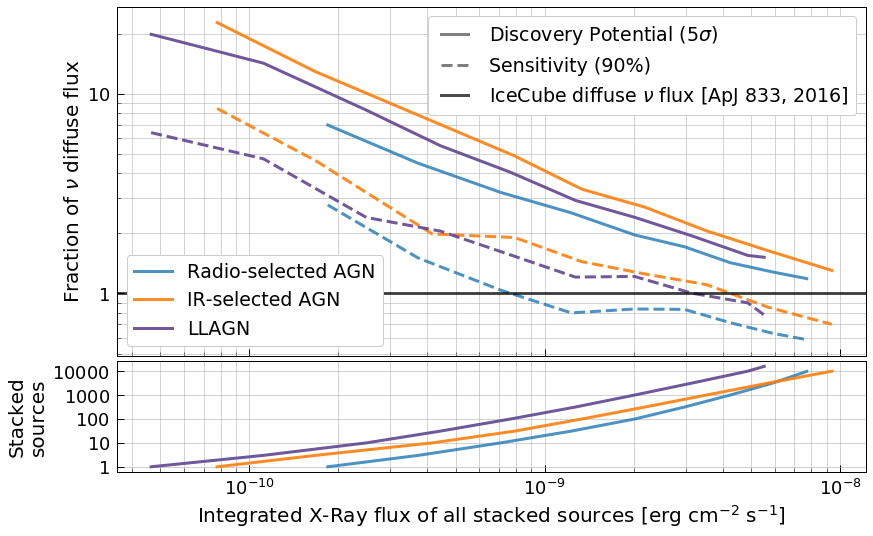

In [36]:
fig1 = plt.figure(1, figsize=(10*1.3, 10*1.3/1.61))
frame1 = fig1.add_axes((.1, .3, .8, .6))

plt.plot(df_rsrlagn_gamma2["int_xray_flux_erg"], 
         df_rsrlagn_gamma2["ratio_dp"]/saturate_ratio_minus2spectrumRLAGN, ls='-', lw=3,
         color='C0',alpha=0.8,
         label =r'Radio-selected AGN') 
plt.plot(df_rsrlagn_gamma2["int_xray_flux_erg"], 
         df_rsrlagn_gamma2["ratio_sens"]/saturate_ratio_minus2spectrumRLAGN, ls='--', lw=3,
         color='C0',alpha=0.8)


plt.plot(df_irsrlagn_gamma2["int_xray_flux_erg"], 
         df_irsrlagn_gamma2["ratio_dp"]/saturate_ratio_minus2spectrumRLAGN, ls='-', lw=3,
         alpha=0.9, color='C1',
         label =r'IR-selected AGN') 
plt.plot(df_irsrlagn_gamma2["int_xray_flux_erg"], 
         df_irsrlagn_gamma2["ratio_sens"]/saturate_ratio_minus2spectrumRLAGN, ls='--', lw=3,
         alpha=0.9,
         color='C1',)

plt.plot(df_llagn_gamma2[df_llagn_gamma2["ratio_dp"]>0]["int_xray_flux_erg"], 
         df_llagn_gamma2[df_llagn_gamma2["ratio_dp"]>0]["ratio_dp"]/saturate_ratio_minus2spectrumLLAGN, ls='-', lw=3,
         color=colors_Prism_8[0], alpha=0.9,
         label =r'LLAGN') 
plt.plot(df_llagn_gamma2["int_xray_flux_erg"], 
         df_llagn_gamma2["ratio_sens"]/saturate_ratio_minus2spectrumLLAGN, ls='--', lw=3,
         color=colors_Prism_8[0], alpha=0.9,)



frame1.set_xscale(u"log")
frame1.set_yscale(u"log")
# frame1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
frame1.grid(True, which='both')
# frame1.legend(loc='upper right', prop={'size':20}, framealpha=1)
plt.ylabel(r'Fraction of $\nu$ diffuse flux')
plt.axhline(y=1, ls='-', lw=3, color='black', alpha=0.7, 
            label = r"IceCube diffuse $\nu$ flux [ApJ 833, 2016]")

frame1.set_yticks([1, 10])
frame1.get_yaxis().set_major_formatter(ScalarFormatter())



handles, labels = frame1.get_legend_handles_labels()
display = (0,1,2)
simArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='-',lw=3)
anyArtist = plt.Line2D((0,1),(0,0), color='gray', linestyle='--',lw=3)
anyArtist2 = plt.Line2D((0,1),(0,0), color='black', linestyle='-',lw=3, alpha=0.7,)

legend1 = frame1.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], loc= 'lower left' , 
                     frameon=1,
                    framealpha =1, ncol=1, prop={'size':19})
plt.gca().add_artist(legend1)

leg = frame1.legend([simArtist, anyArtist,anyArtist2], 
                    [r'Discovery Potential ($5\sigma$)', r'Sensitivity (90%)', 
                     r"IceCube diffuse $\nu$ flux [ApJ 833, 2016]" ],
                loc = 'upper right', framealpha = 1, prop={'size':19}, 
                frameon=1, ncol=1, numpoints=2)



########################
# Nr sources plot
########################

frame2=fig1.add_axes((.1,.1,.8,.19))


plt.plot(df_rsrlagn_gamma2["int_xray_flux_erg"], df_rsrlagn_gamma2["n_src"], ls='-',  lw=3, 
         color='C0',
#          color='gray', 
         alpha=0.8,
#          marker='o',
         label='Number of stacked sources')
plt.plot(df_irsrlagn_gamma2["int_xray_flux_erg"], df_irsrlagn_gamma2["n_src"], ls='-',  lw=3, 
         color='C1',
#          color='gray', 
         alpha=0.9,
#          marker='o',
         label='Number of stacked sources')

plt.plot(df_llagn_gamma2["int_xray_flux_erg"], df_llagn_gamma2["n_src"], ls='-',  lw=3, 
         color=colors_Prism_8[0], alpha=0.9,
         label='Number of stacked sources')



frame2.set_xlabel(r"Integrated X-Ray flux of all stacked sources [erg cm$^{-2}$ s$^{-1}$]")
frame2.set_xscale(u"log")
frame2.set_yscale(u"log")
frame2.set_ylabel('Stacked\nsources')


frame2.set_yticks([1, 10, 100, 1000, 10000])
frame2.get_yaxis().set_major_formatter(ScalarFormatter())


from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import StrMethodFormatter
from matplotlib import ticker
minorLocator = AutoMinorLocator()
frame2.grid(True, which='both')

fig1.tight_layout()
# fig1.savefig(plots_path + "nt8yr_gamma2_rlagn_radio_ir_llagn_dp_fraction_vs_Xray_cut_gamma2_apj833_log.png", format='png')


1.976000067886535e-07 1.8962951825482865e-07


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


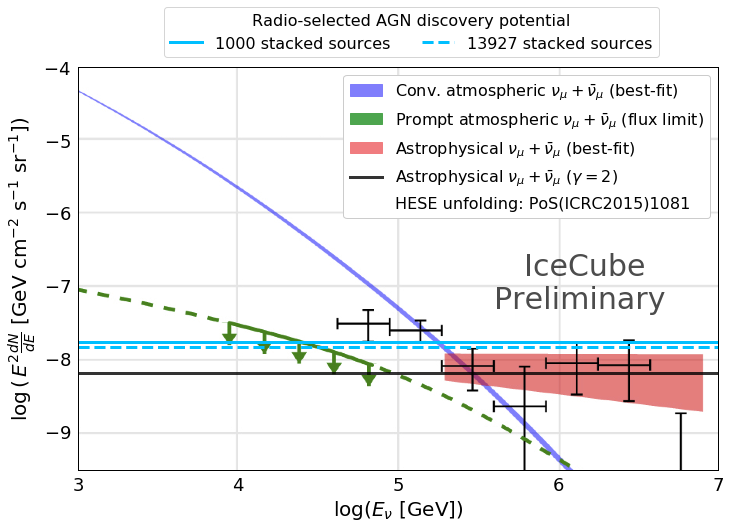

In [21]:
# # img = plt.imread("/Users/federica/Documents/DESY/ICECUBE_PhD/ANALYSIS/RGstacking/AGNcore_senitivity_dp_study/rlagn_radio/apjaa3e5cf5_hr_noframe.jpg")
# # fig1, ax = plt.subplots()

# # # fig1 = plt.figure(1,figsize=(10*1.1, 10*1.1/1.61))
# # ax = plt.subplot(1,1,1)
# # ax.imshow(img, zorder=0, extent=[1e3, 1e7, 2e-10, 1e-4])

# img = plt.imread("/Users/federica/Documents/DESY/ICECUBE_PhD/ANALYSIS/RGstacking/AGNcore_senitivity_dp_study/rlagn_radio/apjaa3e5cf5_hr_noframe_no_legend.jpg")
# fig1, ax = plt.subplots(figsize=(10*1.2, 10*1.2/1.61))

# # e_range = np.logspace(2.73, 5.64, 3)
# e_range = np.logspace(3, 7, 10)
# def z(energy, norm, spectrum):
#     return norm * energy ** (2.0 - spectrum)

# # Diff IC nu flux
# int_diff_flux_min2 = all_flavour_diffuse_flux_gamma2 * (10 ** 5) ** diffuse_gamma
# plt.axhline(y=np.log10(z(e_range, int_diff_flux_min2.to_value(), 2)[0]), 
#             zorder=1,
# #             color='fuchsia', alpha=1,  
#             color='black', alpha=0.8,  
#             label = None)

# # 1000 sources
# total_xray_flux_rlagn = 6.7716784e-5
# dp_1000src = df_rsrlagn[df_rsrlagn['n_src']==1000]['ratio_dp']
# norm_dp_1000src = float(dp_1000src)*total_xray_flux_rlagn/(4*np.pi)
# plt.axhline(y=np.log10(z(e_range, dp_plot[-4:-3]/saturate_ratio_minus2spectrum*int_diff_flux_min2.to_value(),2)[0]), 
#             zorder=1,color='deepskyblue',
#               label = '1000 stacked sources'  
#                 )

# # 13927 sources
# dp_13927src = df_rsrlagn[df_rsrlagn['n_src']==13927]['ratio_dp']
# norm_dp_13927src = float(dp_13927src)*total_xray_flux_rlagn/(4*np.pi)
# print(norm_dp_13927src, norm_dp_1000src)
# plt.axhline(y=np.log10(z(e_range, dp_plot_extr[-1:]/saturate_ratio_minus2spectrum*int_diff_flux_min2.to_value(), 2)[0]),
#             ls='--', color='deepskyblue',
#             label = '13927 stacked sources'  ,zorder=1,
#             )


# handles, labels = ax.get_legend_handles_labels()
# display = (0,1,2)
# legend1 = ax.legend([handle for i,handle in enumerate(handles) if i in display],
#                     [label for i,label in enumerate(labels) if i in display], 
# #                     loc= (0.019, 0.3) , 
# #                     loc='center right', 
#                     bbox_to_anchor=(0.92, 1.17),
#                     framealpha =0.8, ncol=2, prop={'size':16}, 
#                     )
# plt.gca().add_artist(legend1)

# font = {'family': 'serif',
# #         'color':  'darkred',
# #         'weight': 'normal',
# #         'size': 16,
#         }


# plt.plot(0,0,marker = '+', color='#F07C7F', label='HESE')
# legend1.set_title("Radio-selected AGN discovery potential", prop = {'size':16})

# import matplotlib.patches as mpatches

# violet_patch = mpatches.Patch(color='#807EFC', alpha=1)
# green_patch = mpatches.Patch(color='#4DA54E', alpha=1)
# coral_patch = mpatches.Patch(color='#F07C7F', alpha=1)

# # plt.legend(handles=[red_patch])

# simArtist = plt.Line2D((0,1),(0,1), color='black', linestyle='-',lw=3, alpha=0.8)
# heseArtist = plt.Line2D([],[], color='black', linestyle='None', marker='', lw=3, alpha=0.8, markersize=190)

# L = ax.legend([violet_patch, green_patch, coral_patch, simArtist, heseArtist],
#            [r'Conv. atmospheric $\nu_{\mu}+\bar{\nu}_{\mu}$ (best-fit)',
#             r'Prompt atmospheric $\nu_{\mu}+\bar{\nu}_{\mu}$ (flux limit)',
#             r'Astrophysical $\nu_{\mu}+\bar{\nu}_{\mu}$ (best-fit)',
#             r'Astrophysical $\nu_{\mu}+\bar{\nu}_{\mu}$ ($\gamma = 2$)',
#            'HESE unfolding: PoS(ICRC2015)1081'],
# #           bbox_to_anchor=(0.2, 1.13), 
#           ncol=1,          
#           loc = 'upper right', framealpha = 1, prop={'size':16}, frameon=1)
# # plt.setp(L.texts, family='serif')

# plt.ylabel(r"$\log \, ( \, E^{2}\frac{dN}{dE}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$])")
# plt.xlabel(r"$\log ( E_{\nu}$ [GeV])")


# # from matplotlib.ticker import AutoMinorLocator
# # from matplotlib.ticker import StrMethodFormatter
# # minorLocator = AutoMinorLocator()
# # ax.xaxis.set_minor_locator(minorLocator)
# # ax.tick_params(axis='y', which='minor',direction = 'in',length = 5)
# # ax.tick_params(which='major',direction = 'in',length = 10)





# ext = [3, 7, np.log10(3e-10), -4]
# plt.imshow(img, zorder=0, extent=ext)

# aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))
# plt.gca().set_aspect(aspect)

# ax.set_xticks([3, 4, 5, 6, 7])
# plt.grid(False)
# plt.tight_layout()


# plt.annotate("IceCube\nPreliminary ", (0.65, 0.4), 
# #              (0.15, 0.8), 
#              alpha=0.7, fontsize=30, xycoords="axes fraction",
#              multialignment="center")


# fig1.savefig(plots_path + "icrc2019/icrc19_diff_flux_overlaid_gamma2_icprel.png", format='png')
# fig1.savefig(plots_path + "icrc2019/icrc19_diff_flux_overlaid_gamma2_icprel.pdf", format='pdf')